In [188]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [62]:
filenames=listdir("../data/Stations")
print(filenames)
filenames_short=[f.split("_")[0] for f in filenames]
print(filenames_short)
columns=pd.read_csv("../data/Stations/"+filenames[0], sep="\t", encoding='cp1252', skiprows=[1], nrows=0).columns
columns=columns[0].split()
print(columns)
df_dict={}
for n, file in enumerate(filenames):
    print("\n",file)
    df=pd.read_fwf("../data/Stations/"+file, sep="\t", encoding='cp1252', skiprows=[0,1], names=columns)
    df_dict[filenames_short[n]]=df
    # print(df.head())

['FF_Stundenwerte_Beschreibung_Stationen.txt', 'N_Stundenwerte_Beschreibung_Stationen.txt', 'P0_Stundenwerte_Beschreibung_Stationen.txt', 'SD_Stundenwerte_Beschreibung_Stationen.txt', 'TU_Stundenwerte_Beschreibung_Stationen.txt']
['FF', 'N', 'P0', 'SD', 'TU']
['Stations_id', 'von_datum', 'bis_datum', 'Stationshoehe', 'geoBreite', 'geoLaenge', 'Stationsname', 'Bundesland']

 FF_Stundenwerte_Beschreibung_Stationen.txt

 N_Stundenwerte_Beschreibung_Stationen.txt

 P0_Stundenwerte_Beschreibung_Stationen.txt

 SD_Stundenwerte_Beschreibung_Stationen.txt

 TU_Stundenwerte_Beschreibung_Stationen.txt


In [128]:
filenames_short=[f.split("_")[0] for f in filenames]
print(filenames_short)
comp_df=pd.DataFrame()
station_ids_df=pd.DataFrame()
for file in filenames_short:
    # print(df_dict[file])
    station_ids_df[file]=df_dict[file]["Stations_id"]
station_ids_df.head()

['FF', 'N', 'P0', 'SD', 'TU']


,FF,N,P0,SD,TU
0,3,3,3,3,3
1,11,5,5,11,44
2,44,44,29,44,52
3,52,71,46,49,71
4,72,73,47,52,73


In [82]:
station_ids_df.describe()

,FF,N,P0,SD,TU
count,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3966.729524,2958.773333,3467.832381,2343.500952,2652.441905
std,3467.821432,1792.094260,2055.076261,1403.539098,1581.396428
min,3.000000,3.000000,3.000000,3.000000,3.000000
25%,1572.000000,1332.000000,1587.000000,1078.000000,1270.000000
50%,3244.000000,3023.000000,3432.000000,2436.000000,2680.000000
75%,5327.000000,4393.000000,5374.000000,3540.000000,3925.000000
max,19317.000000,6258.000000,7235.000000,4753.000000,5546.000000


In [131]:
maxval=station_ids_df.max().max()
# print(maxval)
id_df=pd.DataFrame(columns=filenames_short)
ids=[np.int64(i) for i in range(maxval+1)]
# print(ids)
id_list=[]
for id in ids:
    temp = True
    for file in filenames_short:
        # print(id in station_ids_df[col].values)
        if id in station_ids_df[file].values:
            temp = temp & True
            # print(file,id)
        else:
            temp = temp & False
    if temp==True:
        id_list.append(id)
print(id_list)
print(len(id_list))

[3, 102, 161, 164, 175, 183, 198, 232, 282, 298, 303, 342, 348, 427, 430, 433, 460, 591, 596, 599, 603, 656, 662, 691, 701, 704, 722, 769, 840, 850, 853, 856, 867, 880, 891, 920, 953, 954, 963, 1001, 1048, 1078, 1200, 1219, 1228, 1262, 1270, 1303, 1346, 1358, 1420, 1443, 1468, 1503, 1544, 1550, 1580, 1587, 1605, 1612, 1639, 1684, 1691, 1694, 1757, 1759, 1766, 1832, 1869, 1975, 2014, 2023, 2044, 2115, 2171, 2261, 2290, 2303, 2374, 2429, 2437, 2456, 2483, 2485, 2503, 2522, 2532, 2559, 2564, 2565, 2597, 2601, 2638, 2656, 2667, 2712, 2794, 2812, 2843, 2907, 2925, 2928, 2932, 2961, 2985, 3015, 3023, 3028, 3032, 3085, 3086, 3093, 3098, 3126, 3158, 3166, 3167, 3196, 3231, 3268, 3287, 3362, 3366, 3379, 3390, 3404, 3478, 3513, 3552, 3575, 3631, 3659, 3660, 3668, 3730, 3761, 3791, 3811, 3815, 3821, 3879, 3897, 3946, 3987, 4024, 4039, 4104, 4177, 4271, 4336, 4371, 4393, 4464, 4466, 4501, 4625, 4629, 4642, 4745, 4752]
160


In [145]:
usable_stations=pd.DataFrame(columns=columns)
for n, file in enumerate(filenames):
    df=df_dict[filenames_short[n]]
    usable_stations=df[df["Stations_id"].isin(id_list)]
print(usable_stations.columns)
print(usable_stations.head())

Index(['Stations_id', 'von_datum', 'bis_datum', 'Stationshoehe', 'geoBreite',
       'geoLaenge', 'Stationsname', 'Bundesland'],
      dtype='object')
    Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  geoLaenge  \
0             3   19500401   20110331            202    50.7827     6.0941   
8           102   20020101   20220915             32    53.8633     8.1275   
16          161   20110901   20220915             75    50.4237     7.4202   
17          164   19560101   20220915             54    53.0316    13.9908   
19          175   19550101   19751231            413    49.2964    10.5751   

             Stationsname           Bundesland  
0                  Aachen  Nordrhein-Westfalen  
8   Leuchtturm Alte Weser        Niedersachsen  
16              Andernach      Rheinland-Pfalz  
17             Angermünde          Brandenburg  
19                Ansbach               Bayern  


In [198]:
all_stations=pd.DataFrame(columns=columns)
for n, file in enumerate(filenames):
    df=df_dict[filenames_short[n]]
    all_stations = pd.concat([all_stations, df], axis=0)
print(all_stations.describe())
all_stations=all_stations.drop_duplicates(subset="Stations_id")
print(all_stations.describe())

        Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  \
count          3305       3305       3305           3305   3305.000   
unique         1566        810        670            654   1539.000   
top               3   19510101   20220915              3     51.296   
freq              5        269       1224             35     10.000   

        geoLaenge Stationsname Bundesland  
count   3305.0000         3305       3305  
unique  1538.0000         1579         17  
top        7.5906       Aachen     Bayern  
freq      10.0000            5        667  
        Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  \
count          1566       1566       1566           1566    1566.00   
unique         1566        585        419            654    1539.00   
top               3   19510101   20220916              1      49.45   
freq              1         82        402             15       3.00   

        geoLaenge Stationsname Bundesland  
count   1566.0000       

In [154]:
BBox = (usable_stations.geoLaenge.min(),   usable_stations.geoLaenge.max(),      
         usable_stations.geoBreite.min(), usable_stations.geoBreite.max())
print(BBox)
print((BBox[2]+BBox[3])/2)

(6.0941, 14.9506, 47.3984, 55.011)
51.2047


midpoint:  10.52235 51.2047


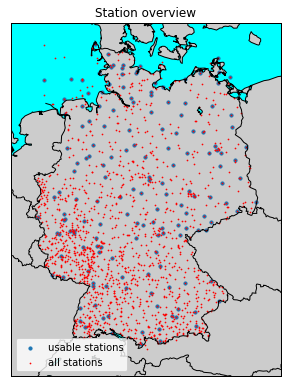

In [208]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# make up some data for scatter plot
from cProfile import label


lons = usable_stations.geoLaenge.tolist()
lats = usable_stations.geoBreite.tolist()
lons_all = all_stations.geoLaenge.tolist()
lats_all = all_stations.geoBreite.tolist()

fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            # llcrnrlat=BBox[2], urcrnrlat=BBox[3], \
            # llcrnrlon=BBox[0], urcrnrlon=BBox[1], \
            llcrnrlat=46.5, urcrnrlat=55.5, \
            llcrnrlon=5, urcrnrlon=16, \
            lat_ts=(BBox[2]+BBox[3])/2, \
            resolution='i')
m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.shadedrelief()
# draw parallels and meridians.
# m.drawparallels(range(46, 56, 2))
# m.drawmeridians(range(5, 15, 2))
m.drawmapboundary(fill_color='aqua')
m.drawcountries(linewidth=1)
print("midpoint: ", (BBox[0]+BBox[1])/2, (BBox[2]+BBox[3])/2)
x1, y1 =m((BBox[0]+BBox[1])/2, (BBox[2]+BBox[3])/2)
x, y =m(lons, lats)
x_all, y_all =m(lons_all, lats_all)

# plt.scatter(x1, y1)
scatter_1 = plt.scatter(x, y, s=10, label="usable stations")
scatter_2 = plt.scatter(x_all, y_all, color="red", s=.5, label="all stations")
plt.legend(handles=[scatter_1, scatter_2])
plt.title("Station overview")
plt.show()
